In [1]:
from google.colab import files
uploaded = files.upload()  # Ini akan membuka dialog untuk memilih file dari komputer


Saving CitarumWater.csv to CitarumWater.csv


Akurasi Model: 0.9626666666666667
Confusion Matrix:
[[277  13   0   0]
 [ 12 435   0   0]
 [  0   1   7   0]
 [  0   0   2   3]]
Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.96      0.96       290
           2       0.97      0.97      0.97       447
           3       0.78      0.88      0.82         8
           4       1.00      0.60      0.75         5

    accuracy                           0.96       750
   macro avg       0.93      0.85      0.88       750
weighted avg       0.96      0.96      0.96       750



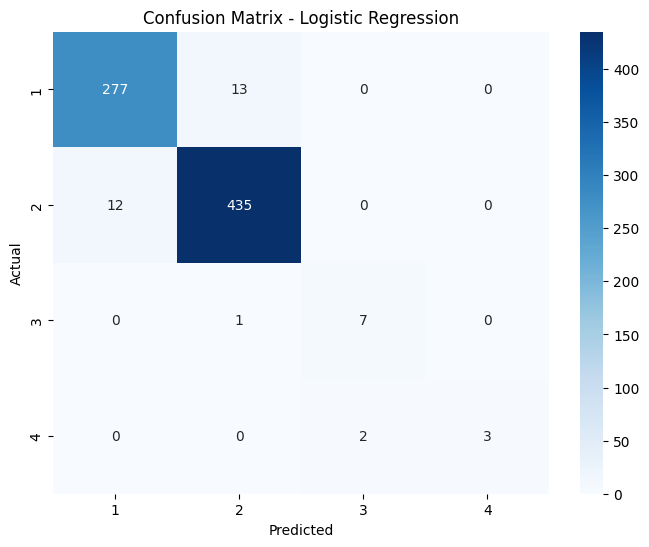

Penjelasan Evaluasi:
- Akurasi: Mengukur seberapa sering model memberikan prediksi yang benar.
- Precision: Ketepatan prediksi benar dibandingkan semua prediksi yang dihasilkan.
- Recall: Kemampuan model dalam mendeteksi instance benar dari semua instance sebenarnya.
- F1-Score: Rata-rata harmonik antara precision dan recall, berguna jika dataset tidak seimbang.


In [2]:
# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset (use the dataset uploaded to Colab)
data = pd.read_csv('CitarumWater.csv')

# Clean up the dataset (e.g., remove irrelevant columns, convert types, and handle missing data)
data_cleaned = data.drop(columns=['No', 'NamaSungai', 'TitikPantau', 'Waktu', 'Temp', 'O2'])
data_cleaned = data_cleaned.dropna()

# Separate the features (X) and target label (y)
X = data_cleaned.drop(columns=['Class'])
y = data_cleaned['Class']

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature data to normalize it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Predict the test set results
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model: Accuracy, Confusion Matrix, Classification Report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display evaluation results
print(f'Akurasi Model: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Explanation of evaluation metrics
print("Penjelasan Evaluasi:")
print("- Akurasi: Mengukur seberapa sering model memberikan prediksi yang benar.")
print("- Precision: Ketepatan prediksi benar dibandingkan semua prediksi yang dihasilkan.")
print("- Recall: Kemampuan model dalam mendeteksi instance benar dari semua instance sebenarnya.")
print("- F1-Score: Rata-rata harmonik antara precision dan recall, berguna jika dataset tidak seimbang.")
